<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/WOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',100)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv('/content/drive/MyDrive/datasets/churn.csv')

In [7]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,OR,157,510,no,yes,30,NaN,107,33.03,243.2,108,20.67,NaN,114,14.50,7.1,5,1.92,1.0,False
1,RI,111,415,no,no,0,NaN,107,39.00,214.1,99,18.20,289.6,95,13.03,10.4,6,2.81,4.0,False
2,IN,101,415,no,yes,42,209.2,82,35.56,159.7,74,13.57,181.6,100,8.17,9.5,3,NaN,0.0,False
3,MI,61,415,no,no,0,NaN,105,32.11,153.6,116,13.06,213.3,106,9.60,10.2,2,2.75,2.0,False
4,OK,89,510,no,no,0,NaN,95,51.66,260.9,114,22.18,312.1,89,14.04,5.3,3,1.43,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,RI,83,510,no,no,0,NaN,106,44.15,152.7,116,12.98,224.7,92,10.11,10.2,2,2.75,0.0,False
2495,HI,149,510,no,no,0,NaN,61,28.32,218.8,107,18.60,NaN,131,9.37,8.2,6,2.21,7.0,False
2496,ME,105,408,no,yes,33,NaN,68,35.63,146.9,140,12.49,NaN,131,5.44,10.6,3,2.86,2.0,False
2497,CO,89,415,no,no,0,NaN,128,30.55,299.8,92,25.48,185.3,120,8.34,7.6,3,2.05,1.0,False


1- State: the US state in which the customer resides, indicated by a two-letter abbreviation
2- Account Length: the number of days that this account has been active
3- Area Code: the three-digit area code of the corresponding customer’s phone number
4- Phone: the remaining seven-digit phone number
5- Int’l Plan: whether the customer has an international calling plan: yes/no
6- VMail Plan: whether the customer has a voice mail feature: yes/no
7- VMail Message: presumably the average number of voice mail messages per month
8- Day Mins: the total number of calling minutes used during the day
9- Day Calls: the total number of calls placed during the day
10- Day Charge: the billed cost of daytime calls
11- Eve Mins: the total number of calling minutes used during the evening
12- Eve Calls: the total number of calls placed during the evening
13- Eve Charge: the billed cost of evening time calls
14- Night Mins: the total number of calling minutes used during the night
15- Night Calls: the total number of calls placed during the night
16- Night Charge: the billed cost of nighttime calls
17- Intl Mins: the total number of international minutes
18- Intl Calls: the total number of international calls
19- Intl Charge: the billed cost for international calls
20- CustServ Calls: the number of calls placed to Customer Service
21- Churn?: whether the customer left the service: true/false

In [8]:
import missingno as msno


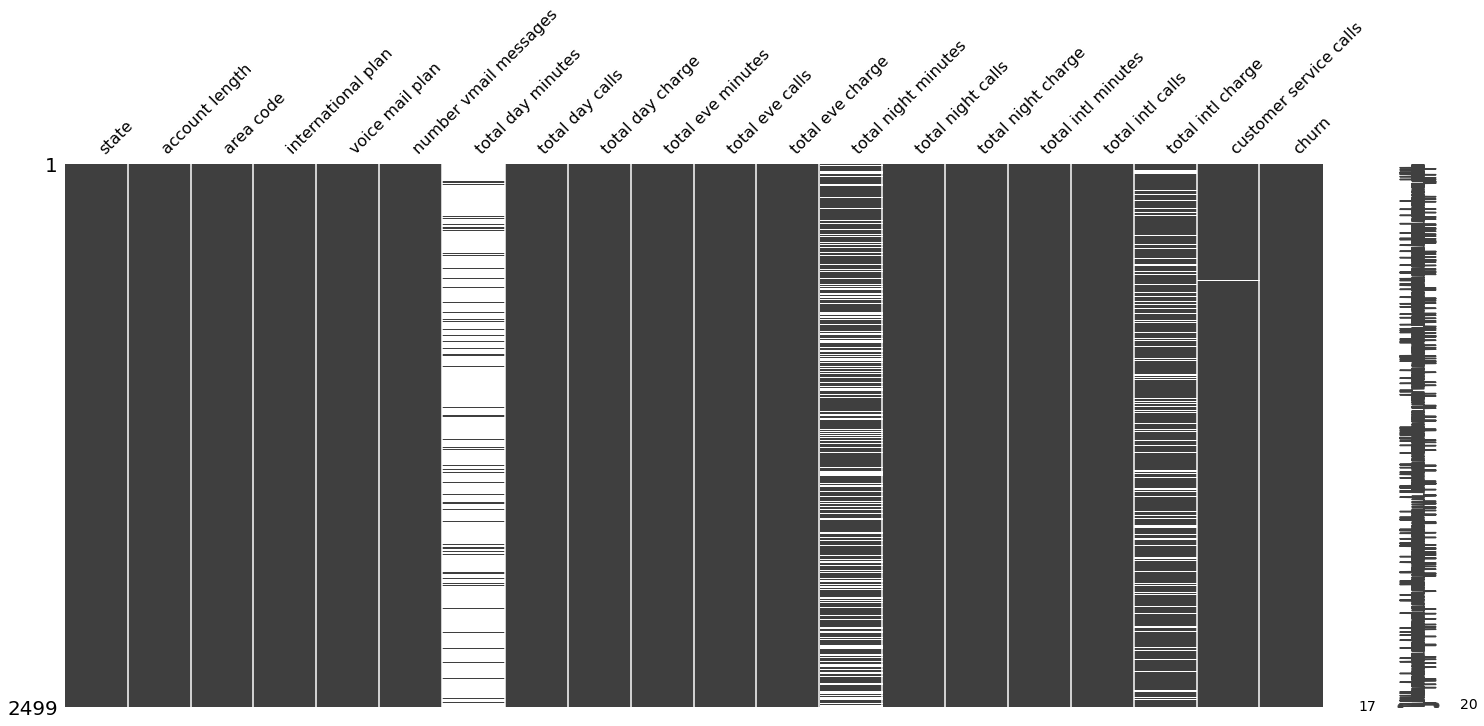

In [9]:
msno.matrix(data)

In [11]:
data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [10]:
categoricas=['international plan','voice mail plan']
continuas=['total day calls','total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']
tgt=['churn']

In [12]:
data[continuas].describe(np.arange(.1,1,.1))


,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,1749.000000,2499.000000,2499.000000,2499.000000,2499.000000,2124.000000,2497.000000
mean,100.661465,30.689840,202.097279,100.038415,17.178471,200.873985,100.265306,9.025070,10.216006,4.499400,2.771968,1.581498
std,20.177074,9.205901,50.536417,20.000363,4.295594,50.842632,19.586795,2.266528,2.796960,2.437263,0.749757,1.313402
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
10%,75.000000,18.866000,138.700000,74.000000,11.790000,138.300000,75.000000,6.210000,6.700000,2.000000,1.810000,0.000000
20%,84.000000,23.146000,159.600000,84.000000,13.570000,159.760000,84.000000,7.150000,8.000000,3.000000,2.160000,0.000000
30%,91.000000,26.034000,175.040000,90.000000,14.880000,173.100000,90.000000,7.824000,8.900000,3.000000,2.427000,1.000000
40%,96.000000,28.370000,189.520000,95.000000,16.112000,187.200000,95.000000,8.460000,9.620000,4.000000,2.620000,1.000000
50%,101.000000,30.690000,202.800000,100.000000,17.240000,198.700000,100.000000,9.000000,10.300000,4.000000,2.780000,1.000000
60%,106.000000,33.112000,214.680000,105.000000,18.248000,212.580000,105.000000,9.580000,11.000000,5.000000,2.970000,2.000000


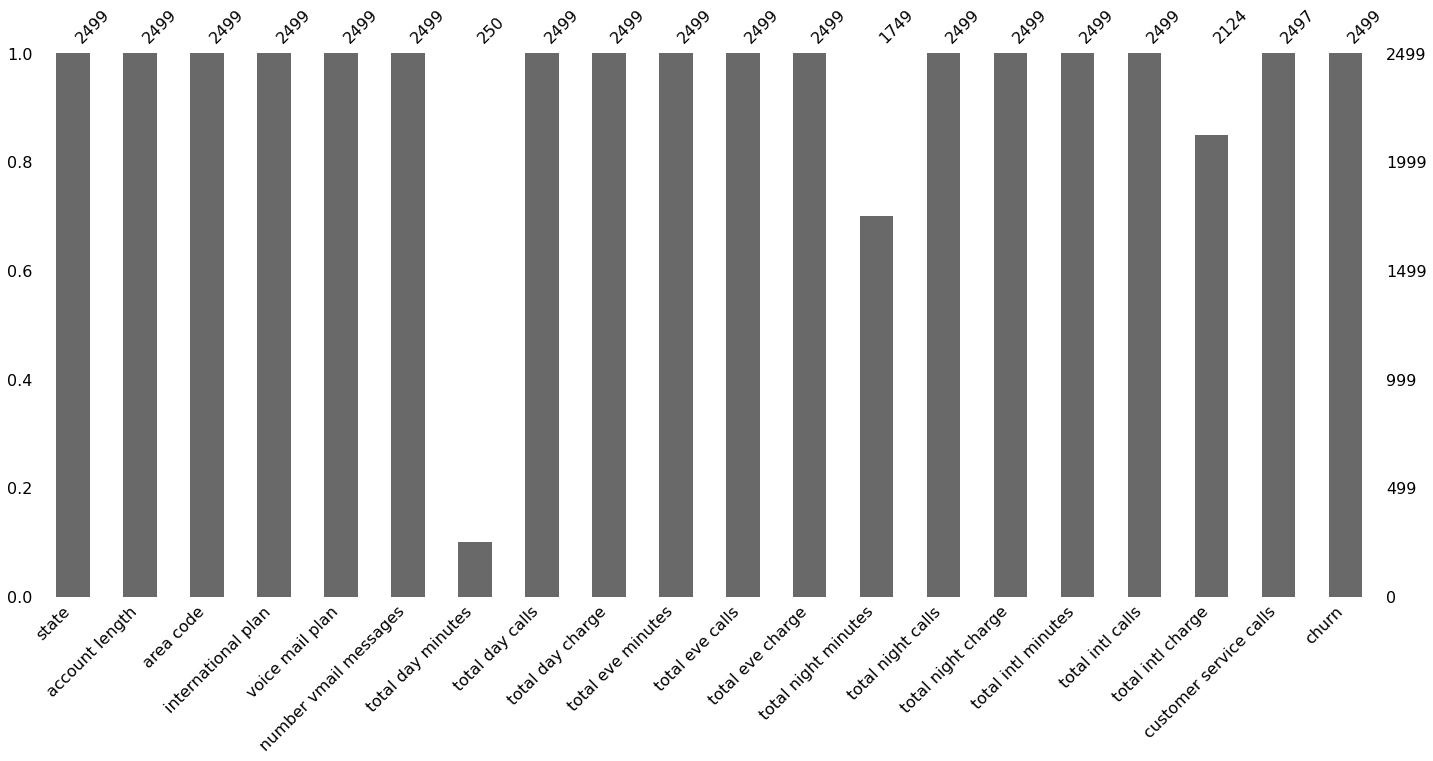

In [13]:
msno.bar(data)

In [14]:
data.isnull().sum()/data.shape[0]

state                     0.00000
account length            0.00000
area code                 0.00000
international plan        0.00000
voice mail plan           0.00000
number vmail messages     0.00000
total day minutes         0.89996
total day calls           0.00000
total day charge          0.00000
total eve minutes         0.00000
total eve calls           0.00000
total eve charge          0.00000
total night minutes       0.30012
total night calls         0.00000
total night charge        0.00000
total intl minutes        0.00000
total intl calls          0.00000
total intl charge         0.15006
customer service calls    0.00080
churn                     0.00000
dtype: float64

In [15]:
data.drop(columns=['total day minutes'],inplace=True)

data.reset_index(drop=True,inplace=True)

In [16]:
#Imputamos valores nulos
data['customer service calls']=data['customer service calls'].fillna(data['customer service calls'].mean())

data['total intl charge']=data['total intl charge'].fillna(data['total intl charge'].median())

data['total night minutes']=data['total night minutes'].fillna(data['total night minutes'].median())

In [17]:
data.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
def binning_opt(df, feature, target):
    dt = DecisionTreeClassifier(max_depth=11, min_samples_leaf=0.05, max_features=1)
    X = df.loc[df[feature].notnull(), [feature]]
    y = df.loc[df[feature].notnull(), target]
    dt.fit(X, y)
    new_feature = f"Cop_{feature}"
    df.loc[df[feature].notnull(), new_feature] = dt.apply(X)
    aux = df[[new_feature, feature]].groupby([new_feature]).agg(["min", "max", "count"])
    aux.columns = aux.columns.droplevel(0)
    aux[f"bin_{feature}"] = aux.apply(lambda x:f"({x['min']}, {x['max']}]", axis = 1)
    df = df.merge(aux.reset_index()[[f"bin_{feature}", new_feature]], on = new_feature, how = "left")
    df = df.drop(columns=[new_feature]).rename(columns={f"bin_{feature}": new_feature})
    df[new_feature].fillna("Missing", inplace=True)
    return df, new_feature

In [20]:
binning_opt(data,continuas[0],tgt)[0]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Cop_total day calls
0,OR,157,510,no,yes,30,107,33.03,243.2,108,20.67,198.7,114,14.50,7.1,5,1.92,1.0,False,"(104, 107]"
1,RI,111,415,no,no,0,107,39.00,214.1,99,18.20,289.6,95,13.03,10.4,6,2.81,4.0,False,"(104, 107]"
2,IN,101,415,no,yes,42,82,35.56,159.7,74,13.57,181.6,100,8.17,9.5,3,2.78,0.0,False,"(81, 86]"
3,MI,61,415,no,no,0,105,32.11,153.6,116,13.06,213.3,106,9.60,10.2,2,2.75,2.0,False,"(104, 107]"
4,OK,89,510,no,no,0,95,51.66,260.9,114,22.18,312.1,89,14.04,5.3,3,1.43,1.0,True,"(95, 98]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,RI,83,510,no,no,0,106,44.15,152.7,116,12.98,224.7,92,10.11,10.2,2,2.75,0.0,False,"(104, 107]"
2495,HI,149,510,no,no,0,61,28.32,218.8,107,18.60,198.7,131,9.37,8.2,6,2.21,7.0,False,"(0, 69]"
2496,ME,105,408,no,yes,33,68,35.63,146.9,140,12.49,198.7,131,5.44,10.6,3,2.86,2.0,False,"(0, 69]"
2497,CO,89,415,no,no,0,128,30.55,299.8,92,25.48,185.3,120,8.34,7.6,3,2.05,1.0,False,"(126, 133]"


In [21]:
binning_opt(data,continuas[1],tgt)[0]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Cop_total day calls,Cop_total day charge
0,OR,157,510,no,yes,30,107,33.03,243.2,108,20.67,198.7,114,14.50,7.1,5,1.92,1.0,False,18,"(32.91, 33.93]"
1,RI,111,415,no,no,0,107,39.00,214.1,99,18.20,289.6,95,13.03,10.4,6,2.81,4.0,False,18,"(37.96, 41.62]"
2,IN,101,415,no,yes,42,82,35.56,159.7,74,13.57,181.6,100,8.17,9.5,3,2.78,0.0,False,8,"(33.97, 35.56]"
3,MI,61,415,no,no,0,105,32.11,153.6,116,13.06,213.3,106,9.60,10.2,2,2.75,2.0,False,18,"(31.69, 32.88]"
4,OK,89,510,no,no,0,95,51.66,260.9,114,22.18,312.1,89,14.04,5.3,3,1.43,1.0,True,12,"(44.97, 59.64]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,RI,83,510,no,no,0,106,44.15,152.7,116,12.98,224.7,92,10.11,10.2,2,2.75,0.0,False,18,"(41.63, 44.95]"
2495,HI,149,510,no,no,0,61,28.32,218.8,107,18.60,198.7,131,9.37,8.2,6,2.21,7.0,False,2,"(27.8, 29.73]"
2496,ME,105,408,no,yes,33,68,35.63,146.9,140,12.49,198.7,131,5.44,10.6,3,2.86,2.0,False,2,"(35.6, 37.94]"
2497,CO,89,415,no,no,0,128,30.55,299.8,92,25.48,185.3,120,8.34,7.6,3,2.05,1.0,False,23,"(29.77, 31.65]"


In [22]:

for feat in continuas:
    data, new_feat = binning_opt(df=data, feature=feat, target=tgt)


In [23]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Cop_total day calls,Cop_total day charge,Cop_total eve minutes,Cop_total eve calls,Cop_total eve charge,Cop_total night minutes,Cop_total night calls,Cop_total night charge,Cop_total intl minutes,Cop_total intl calls,Cop_total intl charge,Cop_customer service calls
0,OR,157,510,no,yes,30,107,33.03,243.2,108,20.67,198.7,114,14.50,7.1,5,1.92,1.0,False,"(104, 107]","(32.91, 33.93]","(234.3, 249.1]","(108, 110]","(19.92, 21.17]","(197.7, 202.6]","(111, 114]","(12.24, 17.77]","(6.5, 7.8]","(5, 5]","(1.76, 2.11]","(1.0, 1.0]"
1,RI,111,415,no,no,0,107,39.00,214.1,99,18.20,289.6,95,13.03,10.4,6,2.81,4.0,False,"(104, 107]","(37.96, 41.62]","(207.4, 216.5]","(97, 99]","(17.63, 18.4]","(270.4, 395.0]","(94, 96]","(12.24, 17.77]","(10.3, 10.6]","(6, 6]","(2.78, 2.84]","(4.0, 9.0]"
2,IN,101,415,no,yes,42,82,35.56,159.7,74,13.57,181.6,100,8.17,9.5,3,2.78,0.0,False,"(81, 86]","(33.97, 35.56]","(155.0, 166.5]","(67, 74]","(13.18, 14.15]","(174.3, 189.4]","(100, 102]","(8.03, 8.52]","(9.1, 9.6]","(3, 3]","(2.78, 2.84]","(0.0, 0.0]"
3,MI,61,415,no,no,0,105,32.11,153.6,116,13.06,213.3,106,9.60,10.2,2,2.75,2.0,False,"(104, 107]","(31.69, 32.88]","(141.5, 154.9]","(115, 118]","(12.03, 13.17]","(202.8, 216.4]","(103, 107]","(9.54, 10.11]","(9.7, 10.2]","(2, 2]","(2.67, 2.75]","(1.5814977973568283, 2.0]"
4,OK,89,510,no,no,0,95,51.66,260.9,114,22.18,312.1,89,14.04,5.3,3,1.43,1.0,True,"(95, 98]","(44.97, 59.64]","(249.2, 261.9]","(111, 114]","(21.18, 22.26]","(270.4, 395.0]","(85, 90]","(12.24, 17.77]","(0.0, 6.4]","(3, 3]","(0.0, 1.73]","(1.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,RI,83,510,no,no,0,106,44.15,152.7,116,12.98,224.7,92,10.11,10.2,2,2.75,0.0,False,"(104, 107]","(41.63, 44.95]","(141.5, 154.9]","(115, 118]","(12.03, 13.17]","(216.5, 230.8]","(91, 93]","(9.54, 10.11]","(9.7, 10.2]","(2, 2]","(2.67, 2.75]","(0.0, 0.0]"
2495,HI,149,510,no,no,0,61,28.32,218.8,107,18.60,198.7,131,9.37,8.2,6,2.21,7.0,False,"(0, 69]","(27.8, 29.73]","(216.6, 225.1]","(104, 107]","(18.41, 19.13]","(197.7, 202.6]","(125, 131]","(9.24, 9.53]","(7.9, 8.6]","(6, 6]","(2.13, 2.4]","(4.0, 9.0]"
2496,ME,105,408,no,yes,33,68,35.63,146.9,140,12.49,198.7,131,5.44,10.6,3,2.86,2.0,False,"(0, 69]","(35.6, 37.94]","(141.5, 154.9]","(133, 170]","(12.03, 13.17]","(197.7, 202.6]","(125, 131]","(1.04, 5.97]","(10.3, 10.6]","(3, 3]","(2.86, 2.94]","(1.5814977973568283, 2.0]"
2497,CO,89,415,no,no,0,128,30.55,299.8,92,25.48,185.3,120,8.34,7.6,3,2.05,1.0,False,"(126, 133]","(29.77, 31.65]","(275.5, 361.8]","(90, 93]","(23.42, 30.75]","(174.3, 189.4]","(120, 124]","(8.03, 8.52]","(6.5, 7.8]","(3, 3]","(1.76, 2.11]","(1.0, 1.0]"


In [24]:
def woe_generator(df,f,target):
    aux = df[[f,target]].copy()
    aux['n'] = 1

    aux = aux.pivot_table(columns=target,
                          index=f,
                          values='n',
                          aggfunc='count',
                          fill_value=0)

    aux['pne'] = aux[0]/aux[0].sum()
    aux['pe'] = aux[1]/aux[1].sum()

    aux['woe'] = np.log(aux['pne']/aux['pe'])

    aux['iv'] = aux['woe']*(aux['pne']-aux['pe'])
    return aux

In [25]:
def iv(target,df,var):
    target =target
    iv_dict = {}
    for f in var:
        aux=woe_generator(df,f,target)

        iv_dict[f]=aux['iv'].sum()
      
    return iv_dict

In [26]:
vars_cop=[x for x in data.columns if x.startswith('Cop')]

In [27]:
tgt

['churn']

In [28]:
iv(target=tgt[0],df=data,var=vars_cop+categoricas)

{'Cop_customer service calls': 0.5138036244999584,
 'Cop_total day calls': 0.068424316766616,
 'Cop_total day charge': 0.8568921178681946,
 'Cop_total eve calls': 0.05603558748454575,
 'Cop_total eve charge': 0.23404654880817832,
 'Cop_total eve minutes': 0.23404654880817832,
 'Cop_total intl calls': 0.04982534524206579,
 'Cop_total intl charge': 0.11841316777107656,
 'Cop_total intl minutes': 0.16051594690049448,
 'Cop_total night calls': 0.10034644284754476,
 'Cop_total night charge': 0.10811066660642847,
 'Cop_total night minutes': 0.07211130079777359,
 'international plan': 0.40926398007498277,
 'voice mail plan': 0.09160102022421678}

In [29]:
woe_dict=woe_generator(data,'Cop_total day charge',tgt[0])['woe'].to_dict()

In [30]:
woe_dict

{'(0.0, 15.56]': -0.2221695434078873,
 '(15.59, 20.35]': 0.5532583166660491,
 '(20.45, 22.56]': -0.3795617171593164,
 '(22.59, 24.94]': 0.762535683448532,
 '(24.96, 26.52]': 0.25254957281425966,
 '(26.54, 27.78]': -0.09814925772113092,
 '(27.8, 29.73]': 0.36010547903552165,
 '(29.77, 31.65]': 1.3251863750791089,
 '(31.69, 32.88]': 0.6851490198331118,
 '(32.91, 33.93]': 0.7022434531924119,
 '(33.97, 35.56]': 1.566348431895997,
 '(35.6, 37.94]': 0.7328438936411291,
 '(37.96, 41.62]': -0.3360766052195777,
 '(41.63, 44.95]': -0.8213944694383557,
 '(44.97, 59.64]': -2.1088008294060376}

In [31]:
data['Cop_total day charge']=data['Cop_total day charge'].map(woe_dict)

In [32]:
for feat in vars_cop+categoricas:
    woe_dict=woe_generator(data,feat,tgt[0])['woe'].to_dict()
    data[f'{feat}_woe']=data[feat].map(woe_dict)

In [33]:
X=data.filter(like='woe').copy()

In [34]:
X

,Cop_total day calls_woe,Cop_total day charge_woe,Cop_total eve minutes_woe,Cop_total eve calls_woe,Cop_total eve charge_woe,Cop_total night minutes_woe,Cop_total night calls_woe,Cop_total night charge_woe,Cop_total intl minutes_woe,Cop_total intl calls_woe,Cop_total intl charge_woe,Cop_customer service calls_woe,international plan_woe,voice mail plan_woe
0,0.220876,0.702243,0.330487,0.009903,0.330487,0.017170,0.055756,0.038642,0.594140,0.223322,0.541978,0.338024,0.277718,0.552477
1,0.220876,-0.336077,-0.423182,0.034637,-0.423182,0.329090,0.141735,0.038642,0.043295,0.149282,0.000327,-1.815618,0.277718,-0.167071
2,-0.011837,1.566348,0.465502,-0.548184,0.465502,0.203585,-0.291008,0.420730,-0.113598,0.018935,0.000327,0.124422,0.277718,0.552477
3,0.220876,0.685149,0.968511,0.180054,0.968511,-0.433306,0.051879,-0.271931,0.253798,-0.414408,0.357261,0.201645,0.277718,-0.167071
4,0.114457,-2.108801,-0.710919,-0.189208,-0.710919,0.329090,0.126251,0.038642,0.119122,0.018935,0.058693,0.338024,0.277718,-0.167071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0.220876,-0.821394,0.968511,0.180054,0.968511,0.245532,0.306205,-0.271931,0.253798,-0.414408,0.357261,0.124422,0.277718,-0.167071
2495,-0.317041,0.360105,0.417382,0.283372,0.417382,0.017170,-0.266621,0.206487,-0.081849,0.149282,-0.317686,-1.815618,0.277718,-0.167071
2496,-0.317041,0.732844,0.968511,0.374210,0.968511,0.017170,-0.266621,0.526147,0.043295,0.018935,0.235624,0.201645,0.277718,0.552477
2497,0.340019,1.325186,-0.549461,0.013000,-0.549461,0.203585,0.335405,0.420730,0.594140,0.018935,0.541978,0.338024,0.277718,-0.167071


In [35]:
y=data[tgt]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=777)

In [39]:
nn=MLPClassifier()

In [40]:
nn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [41]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [42]:
metricas(nn,X_test, y_test)

 Roc Validate: 0.889
 Acc Validate: 0.914
 Matrix Conf Validate:  
 [[523  18]
 [ 36  48]]


In [46]:
data[continuas].head(4)

,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,107,33.03,243.2,108,20.67,198.7,114,14.50,7.1,5,1.92,1.0
1,107,39.00,214.1,99,18.20,289.6,95,13.03,10.4,6,2.81,4.0
2,82,35.56,159.7,74,13.57,181.6,100,8.17,9.5,3,2.78,0.0
3,105,32.11,153.6,116,13.06,213.3,106,9.60,10.2,2,2.75,2.0


In [43]:
X=data[continuas].copy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=777)

nn=MLPClassifier()

nn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [45]:
metricas(nn,X_test, y_test)

 Roc Validate: 0.638
 Acc Validate: 0.846
 Matrix Conf Validate:  
 [[525  16]
 [ 80   4]]
